# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import openweathermapy as ow
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city)
response_json = response.json()
print(json.dumps(response_json, indent = 4))


{
    "coord": {
        "lon": -72.07,
        "lat": -45.58
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 31.82,
        "pressure": 1012,
        "humidity": 86,
        "temp_min": 30.2,
        "temp_max": 33.8
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.12
    },
    "clouds": {
        "all": 40
    },
    "dt": 1563766217,
    "sys": {
        "type": 1,
        "id": 8491,
        "message": 0.0063,
        "country": "CL",
        "sunrise": 1563711521,
        "sunset": 1563744618
    },
    "timezone": -14400,
    "id": 3894426,
    "name": "Coihaique",
    "cod": 200
}


In [24]:
# make lists to hold response for each column name dislayed in the df
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
processing_record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
    except:
        print("City not found. Skipping...") 
    continue
        
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bredasdorp
Processing Record 2 | Coquimbo
Processing Record 3 | Rikitea
Processing Record 4 | Luderitz
Processing Record 5 | Marsh Harbour
Processing Record 6 | New Norfolk
Processing Record 7 | Torbay
Processing Record 8 | Nago
City not found. Skipping...
Processing Record 9 | Albany
Processing Record 10 | Atuona
Processing Record 11 | Tabou
Processing Record 12 | Trairi
Processing Record 13 | Airai
Processing Record 14 | San Patricio
Processing Record 15 | Jamestown
City not found. Skipping...
Processing Record 16 | Kupang
Processing Record 17 | Saint George
Processing Record 18 | Carnarvon
Processing Record 19 | Matay
Processing Record 20 | Ushuaia
Processing Record 21 | Constitucion
Processing Record 22 | Khorinsk
Processing Record 23 | Port Elizabeth
Processing Record 24 | Verkhoyansk
City not found. Skipping...
Processing Record 25 | Buala
Processing Record 26 | Klaksvik
Processing Record 27 | Guarapua

Processing Record 226 | Mamedkala
Processing Record 227 | Kathmandu
Processing Record 228 | Todos Santos
Processing Record 229 | Ponta do Sol
Processing Record 230 | Lompoc
Processing Record 231 | Anloga
Processing Record 232 | Antalya
Processing Record 233 | Doha
Processing Record 234 | Yulara
Processing Record 235 | Camacha
Processing Record 236 | Taitung
Processing Record 237 | Sherpur
City not found. Skipping...
Processing Record 238 | Kasane
Processing Record 239 | At-Bashi
Processing Record 240 | Bogorodskoye
Processing Record 241 | Mayo
Processing Record 242 | Lorengau
City not found. Skipping...
Processing Record 243 | Bayir
Processing Record 244 | Honiara
Processing Record 245 | Bagdarin
Processing Record 246 | Luanda
Processing Record 247 | Arlit
Processing Record 248 | Darhan
Processing Record 249 | Garowe
City not found. Skipping...
City not found. Skipping...
Processing Record 250 | Fare
Processing Record 251 | Pontianak
Processing Record 252 | Great Yarmouth
Processing Re

Processing Record 451 | Burnie
Processing Record 452 | Dunedin
Processing Record 453 | Padang
City not found. Skipping...
Processing Record 454 | Kayes
City not found. Skipping...
Processing Record 455 | Vardo
Processing Record 456 | Venice
Processing Record 457 | Omsukchan
Processing Record 458 | Altay
Processing Record 459 | Ibia
Processing Record 460 | Hamilton
Processing Record 461 | Kukshi
Processing Record 462 | Lagoa
Processing Record 463 | Port-Cartier
Processing Record 464 | Divnogorsk
Processing Record 465 | Bilibino
Processing Record 466 | Derzhavinsk
Processing Record 467 | Linjiang
Processing Record 468 | Kasumkent
Processing Record 469 | Mwense
Processing Record 470 | Atasu
Processing Record 471 | La Union
Processing Record 472 | Vanimo
Processing Record 473 | Hailar
City not found. Skipping...
Processing Record 474 | Xichang
Processing Record 475 | Namie
Processing Record 476 | Buraydah
Processing Record 477 | Puerto Escondido
City not found. Skipping...
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City          513
Cloudiness    513
Country       513
Date          513
Humidity      513
Lat           513
Lng           513
Max Temp      513
Wind Speed    513
dtype: int64

In [28]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1563766404,80,-34.53,20.04,41.00,6.93
1,Coquimbo,0,CL,1563766404,87,-29.95,-71.34,50.00,5.82
2,Rikitea,32,PF,1563766405,76,-23.12,-134.97,68.15,19.42
3,Luderitz,0,NA,1563766405,65,-26.65,15.16,57.71,5.82
4,Marsh Harbour,100,BS,1563766254,73,26.54,-77.06,84.35,11.12


In [29]:
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

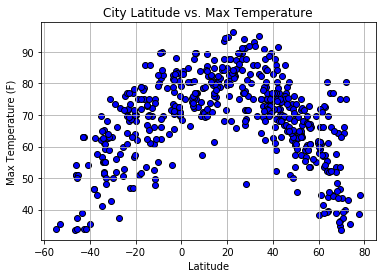

In [39]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"], facecolors= "blue", 
            edgecolor = "black", marker = "o" )
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City_Latitude_vs_Max_Temperature.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

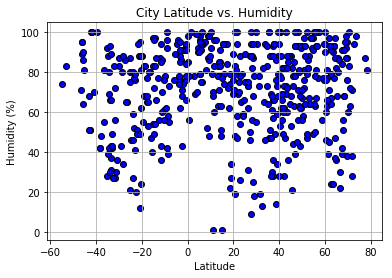

In [40]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], facecolors= "blue", 
            edgecolor = "black", marker = "o" )
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

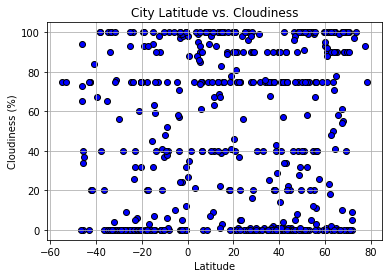

In [41]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], facecolors= "blue", 
            edgecolor = "black", marker = "o" )
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

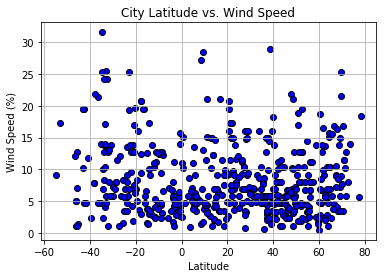

In [42]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], facecolors= "blue", 
            edgecolor = "black", marker = "o" )
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show